In [161]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
pd.options.display.max_colwidth = 1000
%matplotlib inline

In [162]:
df = pd.read_excel("Sample_Longlist_Data.xlsx")

# Data Analysis

In [163]:
df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),"Lohas Living Inc James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 Email Address:jadgemaello@gmail.com James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 EIN: 30-0961431 \nThe European Commission provides for an Online Dispute Resolution Platform, which you can access here: https://ec.europa.eu/consumers/odr/\n\nPlease see the following link for the nationally appointed Alternative Dispute Resolution bodies contact details: https://webgate.ec.europa.eu/od...",Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-1410US,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/page/B9975298-FF1F-4EE2-BD7B-53AE47A44D8A?ref_=ast_bln
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),"Herzlich Willkommen im Amazon Shop von 1a-Handelsagentur. Für Fragen stehen wir Ihnen gerne unter der 039932-829721 zur Verfügung. Sie können auch direkt eine E-Mail an info@1a-handelsagentur.de schreiben. Anschrift\n1a-handelsagentur.de\nAndre Burmeister\nLindenallee 2\n17213 Malchow Kontakt\nTel.: 039932 - 829721 \nFax.: 039932 – 81417 \nE-Mail: info@1a-handelsagentur.de\nInternet: www.1a-handelsagentur.de\n\nUmsatzsteueridentnummer: DE 223758473 \nWir berechnen Ihnen folgende Versandkosten:(DE) Deutschland 0,00 E...",Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenburg17213DE,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12E699E9-FA20-4BC9-A12B-8A9CDE0C446C?ref_=ast_bln
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each customer with the highest standard of customer service.,Business Name:nantongaohuanfangzhipinyouxiangongsi,zhongnanshijicheng27zhuang1410haochongchuanqunantongshi226000CN,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0?ie=UTF8&search-type=ss&index=garden-de&field-keywords=TXYFYP
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to providing each customer with the highest standard of customer service.,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0?ie=UTF8&search-type=ss&index=kitchen-de&field-keywords=SHIFENG
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each customer with the highest standard of customer service.,Business Name:shenzhenfeichangshangmeimaoyiyouxiangongsi,minzhidadaoshaxialaocun94dongA901longhuaxinqushenzhenshi518000CN,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0?ie=UTF8&search-type=ss&index=garden-de&field-keywords=YUOKI99


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1839 non-null   datetime64[ns]
 1   category                                           1839 non-null   object        
 2   sellerlink                                         1839 non-null   object        
 3   sellerlink-url                                     1839 non-null   object        
 4   sellerstorefront-url                               1839 non-null   object        
 5   sellerproductcount                                 1513 non-null   object        
 6   sellerratings                                      1411 non-null   object        
 7   sellerdetails                                      1812 non-null   object        
 8   seller business na

# NULL Values and Hypothesis 

These columns have null values- sellerproductcount, sellerratings, sellerdetails, seller business name, businessaddress, Sample brand name
- One hypothesis is that sellers who dont have full information in their profile suggests a lacking/naive behaviour hence clearing them off would be a good idea.
- Also sellers with no business address or no seller deteails do not exhibit a promising service.

In [165]:
nonull_df = df.dropna().reset_index()

In [166]:
nonull_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   index                                              1159 non-null   int64         
 1   Date Added                                         1159 non-null   datetime64[ns]
 2   category                                           1159 non-null   object        
 3   sellerlink                                         1159 non-null   object        
 4   sellerlink-url                                     1159 non-null   object        
 5   sellerstorefront-url                               1159 non-null   object        
 6   sellerproductcount                                 1159 non-null   object        
 7   sellerratings                                      1159 non-null   object        
 8   sellerdetails     

In [167]:
nonull_df.sellerratings

0       88% positive in the last 12 months (118 ratings)
1        85% positive in the last 12 months (75 ratings)
2        81% positive in the last 12 months (52 ratings)
3               100% positive lifetime (4 total ratings)
4               100% positive lifetime (3 total ratings)
                              ...                       
1154            87% positive lifetime (15 total ratings)
1155     83% positive in the last 12 months (46 ratings)
1156              0% positive lifetime (1 total ratings)
1157             67% positive lifetime (3 total ratings)
1158            100% positive lifetime (2 total ratings)
Name: sellerratings, Length: 1159, dtype: object

In [168]:
nonull_df = nonull_df.drop(columns = "index")
nonull_df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),"Lohas Living Inc James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 Email Address:jadgemaello@gmail.com James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 EIN: 30-0961431 \nThe European Commission provides for an Online Dispute Resolution Platform, which you can access here: https://ec.europa.eu/consumers/odr/\n\nPlease see the following link for the nationally appointed Alternative Dispute Resolution bodies contact details: https://webgate.ec.europa.eu/od...",Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-1410US,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/page/B9975298-FF1F-4EE2-BD7B-53AE47A44D8A?ref_=ast_bln
1,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each customer with the highest standard of customer service.,Business Name:nantongaohuanfangzhipinyouxiangongsi,zhongnanshijicheng27zhuang1410haochongchuanqunantongshi226000CN,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0?ie=UTF8&search-type=ss&index=garden-de&field-keywords=TXYFYP
2,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each customer with the highest standard of customer service.,Business Name:shenzhenfeichangshangmeimaoyiyouxiangongsi,minzhidadaoshaxialaocun94dongA901longhuaxinqushenzhenshi518000CN,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0?ie=UTF8&search-type=ss&index=garden-de&field-keywords=YUOKI99
3,2020-11-15,Garden,Seller 9,Seller 9-link,Seller 9-storefrontlink,1-16 of 133 results,100% positive lifetime (4 total ratings),7WallArts is committed to providing each customer with the highest standard of customer service.,Business Name:SEVEN WALL ARTS (XIAMEN) LIMITED,"No.267 Northern Industrial Zone Jinli VillageHaicang DistrictXiamenFujian, China361026CN",1,0,0,0,65,9,SEVEN WALL ARTS,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0?ie=UTF8&search-type=ss&index=kitchen-de&field-keywords=SEVEN+WALL+ARTS
4,2020-11-15,Garden,Seller 11,Seller 11-link,Seller 11-storefrontlink,"1-16 of over 4,000 results",100% positive lifetime (3 total ratings),888hahahahahaha is committed to providing each customer with the highest standard of customer service.,Business Name:LinFenJingJiKaiFaQuGaoWeiWeiPiJuDian,KaiFaQuHeFenLuWuZhouGuoJiGuangChang2CengL221HaoLinFenShanXiSheng041000CN,15,0,0,0,2,0,TYXTYX,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0?ie=UTF8&search-type=ss&index=kitchen-de&field-keywords=TYXTYX


# Extracting Features from seller ratings

In [169]:
nonull_df.sellerratings = nonull_df.sellerratings.str.findall(r'\d+')

In [170]:
nonull_df['Positive Percentage'] = nonull_df.sellerratings.apply(lambda x: x[0])
nonull_df['Ratings'] = nonull_df.sellerratings.apply(lambda x: x[-1])

# Extracting Features from seller details

In [171]:
#Email, phone numbers, website, extraction compiled in a different CSV called seller_details.csv
#phone numbers of only 7 to 10 digit lengths are included
seller_details = pd.DataFrame()
seller_details["seller_details"] = nonull_df["sellerdetails"]
seller_details["seller_names"] = nonull_df["seller business name"]
seller_details["emails"] = nonull_df.sellerdetails.str.findall('([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)')
seller_details["phoneno"] = nonull_df.sellerdetails.str.findall('(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})')
seller_details["links"] = nonull_df.sellerdetails.str.findall('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-&?=%.]+')
nonull_df["emails"] = seller_details["emails"]
nonull_df["phoneno"] = seller_details["phoneno"] 
nonull_df["links"] = seller_details["links"]
nonull_df = nonull_df.drop(columns = "sellerratings")

In [172]:
seller_details.head()

,seller_details,seller_names,emails,phoneno,links
0,"Lohas Living Inc James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 Email Address:jadgemaello@gmail.com James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 EIN: 30-0961431 \nThe European Commission provides for an Online Dispute Resolution Platform, which you can access here: https://ec.europa.eu/consumers/odr/\n\nPlease see the following link for the nationally appointed Alternative Dispute Resolution bodies contact details: https://webgate.ec.europa.eu/od...",Business Name:Lohas Living Inc,[jadgemaello@gmail.com],"[022-6630, 208-964-6807, 022-6630, 208-964-6807, 0961431]","[gmail.com, https://ec.europa.eu/consumers/odr/, https://webgate.ec.europa.eu/od...]"
1,67878u6i7 is committed to providing each customer with the highest standard of customer service.,Business Name:nantongaohuanfangzhipinyouxiangongsi,[],[],[]
2,78 68yui678 is committed to providing each customer with the highest standard of customer service.,Business Name:shenzhenfeichangshangmeimaoyiyouxiangongsi,[],[],[]
3,7WallArts is committed to providing each customer with the highest standard of customer service.,Business Name:SEVEN WALL ARTS (XIAMEN) LIMITED,[],[],[]
4,888hahahahahaha is committed to providing each customer with the highest standard of customer service.,Business Name:LinFenJingJiKaiFaQuGaoWeiWeiPiJuDian,[],[],[]


# Saving the CSV for all seller contact details
- so that the team can contact them further

In [173]:
seller_details.to_csv("Seller_Contact_Details.csv")

In [174]:
nonull_df["Positive % last 12 months"] = nonull_df["Positive Percentage"].astype('int64')
nonull_df["Number of ratings"] = nonull_df["Ratings"].astype('int64')
nonull_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1159 non-null   datetime64[ns]
 1   category                                           1159 non-null   object        
 2   sellerlink                                         1159 non-null   object        
 3   sellerlink-url                                     1159 non-null   object        
 4   sellerstorefront-url                               1159 non-null   object        
 5   sellerproductcount                                 1159 non-null   object        
 6   sellerdetails                                      1159 non-null   object        
 7   seller business name                               1159 non-null   object        
 8   businessaddress   

# Excluding chinese sellers

In [175]:
nonull_df["Chinese Sellers"] =nonull_df.businessaddress.str.findall('CN').apply(','.join)

In [176]:
final_df = nonull_df[nonull_df["Chinese Sellers"] != 'CN' ].reset_index()
final_df = final_df.drop(columns = ["index", "Chinese Sellers"])

In [177]:
final_df

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerdetails,seller business name,businessaddress,Count of seller brands,...,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,Positive Percentage,Ratings,emails,phoneno,links,Positive % last 12 months,Number of ratings
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results","Lohas Living Inc James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 Email Address:jadgemaello@gmail.com James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 EIN: 30-0961431 \nThe European Commission provides for an Online Dispute Resolution Platform, which you can access here: https://ec.europa.eu/consumers/odr/\n\nPlease see the following link for the nationally appointed Alternative Dispute Resolution bodies contact details: https://webgate.ec.europa.eu/od...",Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-1410US,16,...,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/page/B9975298-FF1F-4EE2-BD7B-53AE47A44D8A?ref_=ast_bln,88,118,[jadgemaello@gmail.com],"[022-6630, 208-964-6807, 022-6630, 208-964-6807, 0961431]","[gmail.com, https://ec.europa.eu/consumers/odr/, https://webgate.ec.europa.eu/od...]",88,118
1,2020-11-15,Garden,Seller 15,Seller 15-link,Seller 15-storefrontlink,1-16 of 919 results,"Impressum\n \n Gesetzliche Anbieterkennung:\n \n Oliver Mills\n 9:PM\n An der Bundesstrasse 26\n 33829 Borgholzhausen\n Deutschland\n Telefon: 015140008562\n E-Mail: webmaster@9pm-store.de\n USt-IdNr.: DE215752000\n \n Wir sind seit 01.08.2015 Mitglied der Initiative ""FairCommerce"".\n Nähere Informationen hierzu finden Sie unter .fair-commerce.de. Alternative Streitbeilegung: \nDie Europäische Kommission bietet eine Onlineplattform für Streitbeilegung an, die Sie hier finden: https://ec.europa.eu/consumers/odr/\n\nUnter diesem L...",Business Name:Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,15,...,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_dp_s_web_19533614031?ie=UTF8&node=19533614031&field-lbr_brands_browse-bin=Unbekannt,97,116,[webmaster@9pm-store.de],"[0151400085, 2157520]","[9pm-store.de, 01.08.2015, .fair-commerce.de., https://ec.europa.eu/consumers/odr/, L...]",97,116
2,2020-11-15,Garden,Seller 23,Seller 23-link,Seller 23-storefrontlink,"1-16 of over 40,000 results",Bestof Floral is committed to providing each customer with the highest standard of customer service.,Business Name:MADEWELL SUPPLY INC,90 BROAD ST 2ND FLOORNEW YORKNY10004-2205US,16,...,8293,Visit the Seville Classics Store,https://www.amazon.de/-/en/stores/Seville+Classics/page/E8D49E5C-1784-4FF1-A92A-C8B52AF7F532?ref_=ast_bln,100,10,[],[],[],100,10
3,2020-11-15,Garden,Seller 24,Seller 24-link,Seller 24-storefrontlink,"1-16 of over 100,000 results","Blumenbecker Industriebedarf GmbH Sudhoferweg 99-107 59269 Beckum Geschäftsführer: Dipl. Kfm. Richard Mayer, Olaf Lingnau Handelsregister: Amtsgericht Münster HRB 7020 Ust-IdNr: DE 214 670 936 Telefon: 02521/8406-0 E-Mail: bib.beckum@blumenbecker.com \nDie Europäische Kommission bietet eine Onlineplattform für Streitbeilegung an, die Sie hier finden: https://ec.europa.eu/consumers/odr/\n\nUnter diesem Link finden Sie die Kontaktdaten der offiziellen Streitbeilegungsstellen: https://webgate.ec.europa...",Business Name:Blumenbecker Industriebedarf GmbH,Sudhoferweg 99-107BeckumNRW59269DE,15,...,11182,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12E699E9-FA20-4BC9-A12B-8A9CDE0C446C?ref_=ast_bln,88,3134,[bib.beckum@blumenbecker.com],[107 5926],"[bib.beckum, blumenbecker.com, https://ec.europa.eu/consumers/odr/, https://webgate.ec.europa...]",88,3134
4,2020-11-15,Garden,Seller 25,Seller 25-link,Seller 25-storefrontlink,"1-16 of over 3,000 results","Herzlich willkommen auf unserer Internetpräsents.\n \n \n \n Wir sind ein alt eingesessenes Blumen-Fachgeschäft im Herzen von Korntal.\n \n\

# EDA

In [178]:
final_df["Number of ratings"].median()

88.0

<AxesSubplot:xlabel='Number of ratings', ylabel='Count'>

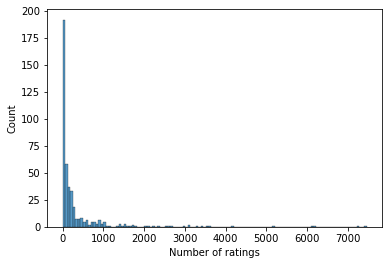

In [179]:
sns.histplot(data = final_df,x = "Number of ratings")


A lot of sellers have 0 ratings hence we need to clear them out

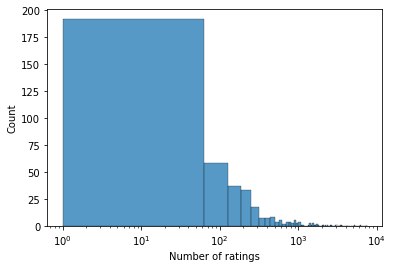

In [180]:
sns.histplot(data = final_df,x = "Number of ratings") #better representation
plt.xscale('log')

In [181]:
final_df=final_df[final_df["Number of ratings"] >= 88].reset_index() #as median is 88
final_df = final_df.drop(columns = "index")

In [182]:
final_df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerdetails,seller business name,businessaddress,Count of seller brands,...,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,Positive Percentage,Ratings,emails,phoneno,links,Positive % last 12 months,Number of ratings
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results","Lohas Living Inc James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 Email Address:jadgemaello@gmail.com James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 EIN: 30-0961431 \nThe European Commission provides for an Online Dispute Resolution Platform, which you can access here: https://ec.europa.eu/consumers/odr/\n\nPlease see the following link for the nationally appointed Alternative Dispute Resolution bodies contact details: https://webgate.ec.europa.eu/od...",Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-1410US,16,...,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/page/B9975298-FF1F-4EE2-BD7B-53AE47A44D8A?ref_=ast_bln,88,118,[jadgemaello@gmail.com],"[022-6630, 208-964-6807, 022-6630, 208-964-6807, 0961431]","[gmail.com, https://ec.europa.eu/consumers/odr/, https://webgate.ec.europa.eu/od...]",88,118
1,2020-11-15,Garden,Seller 15,Seller 15-link,Seller 15-storefrontlink,1-16 of 919 results,"Impressum\n \n Gesetzliche Anbieterkennung:\n \n Oliver Mills\n 9:PM\n An der Bundesstrasse 26\n 33829 Borgholzhausen\n Deutschland\n Telefon: 015140008562\n E-Mail: webmaster@9pm-store.de\n USt-IdNr.: DE215752000\n \n Wir sind seit 01.08.2015 Mitglied der Initiative ""FairCommerce"".\n Nähere Informationen hierzu finden Sie unter .fair-commerce.de. Alternative Streitbeilegung: \nDie Europäische Kommission bietet eine Onlineplattform für Streitbeilegung an, die Sie hier finden: https://ec.europa.eu/consumers/odr/\n\nUnter diesem L...",Business Name:Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,15,...,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_dp_s_web_19533614031?ie=UTF8&node=19533614031&field-lbr_brands_browse-bin=Unbekannt,97,116,[webmaster@9pm-store.de],"[0151400085, 2157520]","[9pm-store.de, 01.08.2015, .fair-commerce.de., https://ec.europa.eu/consumers/odr/, L...]",97,116
2,2020-11-15,Garden,Seller 24,Seller 24-link,Seller 24-storefrontlink,"1-16 of over 100,000 results","Blumenbecker Industriebedarf GmbH Sudhoferweg 99-107 59269 Beckum Geschäftsführer: Dipl. Kfm. Richard Mayer, Olaf Lingnau Handelsregister: Amtsgericht Münster HRB 7020 Ust-IdNr: DE 214 670 936 Telefon: 02521/8406-0 E-Mail: bib.beckum@blumenbecker.com \nDie Europäische Kommission bietet eine Onlineplattform für Streitbeilegung an, die Sie hier finden: https://ec.europa.eu/consumers/odr/\n\nUnter diesem Link finden Sie die Kontaktdaten der offiziellen Streitbeilegungsstellen: https://webgate.ec.europa...",Business Name:Blumenbecker Industriebedarf GmbH,Sudhoferweg 99-107BeckumNRW59269DE,15,...,11182,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12E699E9-FA20-4BC9-A12B-8A9CDE0C446C?ref_=ast_bln,88,3134,[bib.beckum@blumenbecker.com],[107 5926],"[bib.beckum, blumenbecker.com, https://ec.europa.eu/consumers/odr/, https://webgate.ec.europa...]",88,3134
3,2020-11-15,Garden,Seller 25,Seller 25-link,Seller 25-storefrontlink,"1-16 of over 3,000 results","Herzlich willkommen auf unserer Internetpräsents.\n \n \n \n Wir sind ein alt eingesessenes Blumen-Fachgeschäft im Herzen von Korntal.\n \n\n Unser Ziel im Internet ist es, ihnen eine gute Qualität kombiniert mit kompetenter Beratung zukommen zu lassen.\n \n\n \n \n\n Lassen Sie sich bei der Verschönerung ihres Gartens bei einem Rundgang durch unsere virtuellen Verkaufsräume inspirieren und kompetent beraten.\n \n\n \n \n\n Unsere Schwerpunkte im Internet:\n \n \n\n Rasensamen\n \n\n Blumenzwiebeln\n \n\n Sämereien allgemein\n\n BIO Sämereien\n \n\n Pflanzenschutz von Bayer\n \n\n \n Ch

# Positive Ratings

In [183]:
final_df["Positive % last 12 months"].median()

96.0

This means that a seller with a  positive feedback of 96% or more would be more suitable for aquisation 

In [184]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         216 non-null    datetime64[ns]
 1   category                                           216 non-null    object        
 2   sellerlink                                         216 non-null    object        
 3   sellerlink-url                                     216 non-null    object        
 4   sellerstorefront-url                               216 non-null    object        
 5   sellerproductcount                                 216 non-null    object        
 6   sellerdetails                                      216 non-null    object        
 7   seller business name                               216 non-null    object        
 8   businessaddress     

# Negative ratings

In [185]:
months1 = final_df["Max % of negative seller ratings - last 30 days"].median()
months3 = final_df["Max % of negative seller ratings - last 90 days"].median()
months12 = final_df["Max % of negative seller ratings - last 12 months"].median()
print(f"Median of negative feedbacks for last 30 days = {months1}")
print(f"Median of negative feedbacks for last 90 days = {months3}")
print(f"Median of negative feedbacks for last 12 months = {months12}")

Median of negative feedbacks for last 30 days = 1.0
Median of negative feedbacks for last 90 days = 3.0
Median of negative feedbacks for last 12 months = 3.0


In [186]:
best_sellers = final_df[final_df["Max % of negative seller ratings - last 30 days"] <= 1] 
best_sellers = best_sellers[best_sellers["Max % of negative seller ratings - last 90 days"] <= 3] 
best_sellers = best_sellers[best_sellers["Max % of negative seller ratings - last 12 months"] <= 3] 

# Finally sorting all successful sellers by number of ratings recieved

In [187]:
best_sellers = best_sellers.sort_values(by = "Number of ratings", ascending = False).reset_index()

In [188]:
best_sellers = best_sellers.drop(columns = "index")
best_sellers

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerdetails,seller business name,businessaddress,Count of seller brands,...,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,Positive Percentage,Ratings,emails,phoneno,links,Positive % last 12 months,Number of ratings
0,2020-11-15,Garden,Seller 882,Seller 882-link,Seller 882-storefrontlink,1-16 of 786 results,vitabody ist ein Onlinehandel für gesunde und nachhaltige Produkte - viele unserer Produkte sind u.a. BIO zertifiziert.\n \n\n\n v03 trading GmbH ist von ABCERT AG (DE-ÖKO-006) zum Verkauf von Bio-Lebensmitteln zertifiziert. Unser Zertifikat ist erhältlich bei dieser Kontrollstelle unter der Zertifikatsreferenznummer 1909DGPE3CAO0.\n \n \n\n \n---------------------------------------------------------------------------------\n \n\n vitabody ist ein Angebot von:\n\nGesetzliche Anbieterkennung:\n\nv03 Trading GmbH\ndiese vertreten durch...,Business Name:v03 trading GmbH,Hanns-Martin-Schleyer Str. 30aWillichNRW47877DE,15,...,343,wesentlich.,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0?ie=UTF8&search-type=ss&index=garden-de&field-keywords=wesentlich.,98,2333,[],[],"[u.a., durch...]",98,2333
1,2020-11-15,Garden,Seller 31,Seller 31-link,Seller 31-storefrontlink,"1-16 of over 1,000 results","Impressum\n \n Gesetzliche Anbieterkennung:\n \n Daniel Vogeley und Christopher Joachim Gemander GbR\n vertreten durch die Gesellschafter: Daniel Vogeley, Christopher Joachim Gemander\n Auf der Insel 20\n 50259 Pulheim\n Deutschland\n Telefon: 022342509631\n \n E-Mail: info@deinegartenwelt.de\n USt-IdNr.: DE316235833\n \n \n Wir sind seit 04.04.2018 Mitglied der Initiative ""FairCommerce"".\n Nähere Informationen hierzu finden Sie unter .fair-commerce.de.\n \nDie Europäische Kommission bietet eine Onlineplattform für Streitbeilegu...",Business Name:Daniel Vogeley und Christopher Gemander GbR,Auf der Insel 20Pulheim50259DE,6,...,599,Visit the Deine Gartenwelt Store,https://www.amazon.de/-/en/stores/DeineGartenwelt/page/29C6D599-802D-4BC7-9B9D-1B2120839034?ref_=ast_bln,99,1739,[info@deinegartenwelt.de],"[0223425096, 3162358]","[deinegartenwelt.de, 04.04.2018, .fair-commerce.de., Streitbeilegu...]",99,1739
2,2020-11-15,Garden,Seller 244,Seller 244-link,Seller 244-storefrontlink,1-16 of 625 results,"Geschäftsbedingungen 1. Geltungsbereich\n 1.1 Unsere Angebote, Leistungen und Lieferungen erfolgen ausschließlich aufgrund dieser Geschäftsbedingungen. Spätestens mit dem Zustandekommen eines Vertrages oder mit der Entgegennahme der Ware oder Dienstleistung gelten diese Bedingungen als angenommen. Gegenbestätigungen unter Hinweis auf eigene Geschäftsbedingungen wird hiermit ausdrücklich widersprochen.\n 1.2 Schriftliche Individualvereinbarungen gehen diesen Geschäftsbedingungen vor. 2. Angebot 2.1 U...",Business Name:Licht-Studio Völker e.K.,Zinnaer Vorstadt 43JüterbogBrandenburg14913DE,16,...,473,Visit the Steinel Store,https://www.amazon.de/-/en/stores/Steinel+Vertriebs+GmbH+%28FO%29/page/5C1CDC78-499B-4AEA-9647-AF678ED3820A?ref_=ast_bln,94,1699,[],[],"[1.1, 1.2, 2.1, U...]",94,1699
3,2020-11-15,Garden,Seller 494,Seller 494-link,Seller 494-storefrontlink,"1-16 of over 3,000 results",Impressum\n \n Gesetzliche Anbieterkennung:\n \n OTTO RÖHRS GmbH\n diese vertreten durch den Geschäftsführer Thomas Miesner\n Industriestraße 11\n 27383 Scheeßel\n Deutschland\n Telefon: 04263 9380-500\n Telefax: 04263 9380-119\n E-Mail: support@roehrs-baumarkt.de\n USt-IdNr.: DE811241167\n eingetragen im Handelsregister des Amtsgerichtes Walsrode\n Handelsregisternummer HRB 70665\n \n \n Alternative Streitbeilegung:\nDie Europäische Kommission stellt eine Plattform für die außergerichtliche Online-Streitbeilegung (OS-Plattfo...,Business Name:Otto Röhrs GmbH,Otto Röhrs Gmbh Industriestraße 11Scheeßel27383DE,16,...,4316,Neudorff,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0?ie=UTF8&search-type=ss&index=garden-de&field-keywords=Neudorff,97,1584,[support@roehrs-baumarkt.de]

In [190]:
best_sellers.to_csv("Best_Sellers.csv")

# Thank you for the interesting assesment Razor Group